# G-S

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [61]:
pd = pd.read_csv('C:\\Users\\Hardy\\Desktop\\20200424_CWS PSD Model\\T-CWS.csv', low_memory=False)
pd.describe()

,Mesh Size,%Passing
count,85.000000,8.500000e+01
mean,49.276579,3.212769e-01
std,85.341219,3.141665e-01
min,0.147631,1.640000e-07
25%,1.046770,2.152496e-02
50%,7.422120,2.739667e-01
75%,52.626400,5.390597e-01
max,373.147000,9.630000e-01


In [62]:
x = pd['Mesh Size']
y = pd['%Passing']
x = np.array(x)
y = np.array(y)
xmax = x.max()

In [63]:
def func(x,a):
    return ((x/xmax) ** a)
popt, pcov = curve_fit(func, x, y)
print(popt)
a = popt[0] 

[0.37502299]


In [64]:
yvals = func(x,a)
yvals

array([0.05295517, 0.05484035, 0.05679251, 0.0588143 , 0.06090802,
       0.06307632, 0.0653217 , 0.06764708, 0.07005522, 0.07254911,
       0.0751318 , 0.07780639, 0.08057626, 0.08344464, 0.08641523,
       0.08949151, 0.09267727, 0.09597646, 0.09939313, 0.10293141,
       0.10659567, 0.11039021, 0.11432018, 0.11838985, 0.12260432,
       0.12696894, 0.13148878, 0.13616958, 0.1410173 , 0.14603735,
       0.15123611, 0.15661973, 0.16219542, 0.16796925, 0.17394879,
       0.18014119, 0.18655408, 0.19319519, 0.20007266, 0.207195  ,
       0.21457094, 0.22220941, 0.23011975, 0.23831181, 0.24679543,
       0.25558113, 0.26467963, 0.27410156, 0.28385964, 0.29396436,
       0.30442927, 0.31526685, 0.32648953, 0.33811223, 0.35014878,
       0.36261375, 0.37552268, 0.38889064, 0.40273492, 0.41707155,
       0.43191897, 0.44729474, 0.46321783, 0.47970786, 0.49678497,
       0.51447006, 0.53278457, 0.55175099, 0.57139289, 0.59173368,
       0.61279963, 0.63461445, 0.65720528, 0.68060089, 0.70483

In [65]:
np.savetxt('C:\\Users\\Hardy\\Desktop\\20200424_CWS PSD Model\\T-CWS_Result_G-S.csv', yvals,  delimiter=" ")

In [66]:
print('popt:', popt)
print('系数a:', a)

popt: [0.37502299]
系数a: 0.3750229882990421


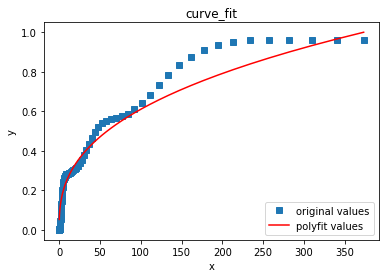

In [67]:
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()


In [68]:
R2 = 1 - ((yvals - y)**2).sum() / ((yvals - y.mean())**2).sum()
print(R2)

0.9385289209095091


# R-R

In [69]:
import math 
from math import exp

In [70]:
x = pd['Mesh Size']
y = pd['%Passing']

In [71]:
x = np.array(x)
y = np.array(y)

In [72]:
def func(x,a):
    return (1 - np.exp(-(x/121.103)**a))
popt, pcov = curve_fit(func, x, y)
print(popt)
a = popt[0] 

[0.55054779]


In [73]:
yvals = func(x,a)
print(yvals)

[0.02456555 0.02584314 0.02718615 0.02859803 0.03008206 0.03164186
 0.03328108 0.03500371 0.03681378 0.03871559 0.04071357 0.0428123
 0.04501672 0.04733173 0.04976275 0.05231512 0.05499454 0.05780699
 0.0607586  0.06385575 0.06710509 0.07051331 0.07408797 0.07783597
 0.08176499 0.08588308 0.09019807 0.09471847 0.09945308 0.10441019
 0.10959902 0.11502859 0.1207089  0.12664879 0.1328585  0.1393477
 0.14612645 0.15320463 0.16059233 0.16829974 0.17633688 0.18471357
 0.19343958 0.20252463 0.21197778 0.22180809 0.23202397 0.24263277
 0.25364311 0.26505991 0.27689018 0.28913828 0.30180691 0.31489979
 0.3284175  0.34235937 0.35672352 0.37150516 0.38669934 0.40229691
 0.41828843 0.43466032 0.45139729 0.46848119 0.48589087 0.50360224
 0.52158788 0.53981755 0.55825809 0.57687219 0.59562124 0.61446045
 0.63334441 0.65222539 0.67105252 0.68976988 0.70832606 0.72666052
 0.74471822 0.76243972 0.77976689 0.79664406 0.81301521 0.82882713
 0.84402959]


In [74]:
np.savetxt('C:\\Users\\Hardy\\Desktop\\20200424_CWS PSD Model\\T-CWS_Result_R-R.csv', yvals,  delimiter=" ")

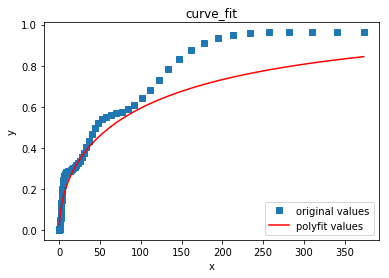

In [75]:
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()

In [76]:
R2 = 1 - ((yvals - y)**2).sum() / ((yvals - y.mean())**2).sum()
print(R2)

0.9039433739436091


# 分形分布

In [68]:
def func(x,D):
    return ((x/xmax) ** (3-D))
popt, pcov = curve_fit(func, x, y)
print(popt)
D = popt[0] 

[2.60036681]


In [69]:
yvals = func(x,D)
print(yvals)

[0.04053219 0.04207095 0.04366927 0.04532711 0.04704882 0.04883564
 0.05068932 0.05261485 0.05461274 0.05668771 0.05884029 0.06107464
 0.06339425 0.06580206 0.06830134 0.07089558 0.0735874  0.07638271
 0.0792836  0.08229496 0.08542019 0.08866407 0.09203156 0.09552648
 0.09915491 0.10292027 0.10682924 0.11088651 0.11509779 0.11946928
 0.12400659 0.12871613 0.13360466 0.13867869 0.14394548 0.14941262
 0.15508713 0.16097715 0.16709063 0.17343676 0.18002352 0.18686063
 0.19395739 0.20132374 0.20896978 0.21690612 0.22514394 0.23369467
 0.2425701  0.25178255 0.26134502 0.27127057 0.28157318 0.29226711
 0.30336664 0.31488858 0.32684725 0.33926066 0.35214565 0.36551917
 0.37940121 0.39381058 0.40876712 0.42429195 0.44040579 0.45713214
 0.47449313 0.49251399 0.51121901 0.53063439 0.55078724 0.57170555
 0.59341838 0.61595565 0.63934877 0.66363072 0.68883443 0.71499666
 0.74215118 0.77033629 0.79959255 0.82996118 0.86148026 0.89420016
 0.92815968 0.96341081 1.        ]


In [70]:
print('popt:', popt)
print('粒度分布维数D:', D)

popt: [2.60036681]
粒度分布维数D: 2.600366808208371


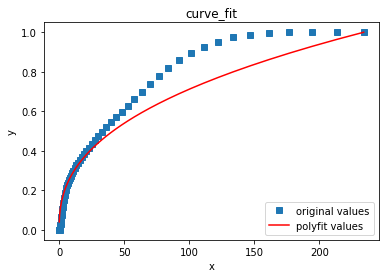

In [71]:
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()

In [72]:
R2 = 1 - ((yvals - y)**2).sum() / ((yvals - y.mean())**2).sum()
print(R2)

0.9145087685190028
